In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 800)
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
bbc = pd.read_csv('data/raw/bbc.csv')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky...
1,business,worldcom boss left books alone former worldcom boss bernie ebbers who is accused of overseeing an $11bn (Â£5.8bn) fraud never made accounting decisions a witness has told jurors. david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors. on monday defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination he asked mr myers if he ever knew mr ebbers make an accounting decision . not that i am aware of mr myers replied. did you ever know mr ebbers to mak...
2,sport,tigers wary of farrell gamble leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes. we and anybody else involved in the process are still some way away from going to the next stage tigers boss john wells told bbc radio leicester. at the moment there are still a lot of unknowns about andy farrell not least his medical situation. whoever does take him on is going to take a big big gamble. farrell who has had persistent knee problems had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game. if he does move...
3,sport,yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round. the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading who beat slough in the second round. conference side exeter city who knocked out doncaster on saturday will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park. a number of premiership teams face difficult away games against cha...
4,entertainment,ocean s twelve raids box office ocean s twelve the crime caper sequel starring george clooney brad pitt and julia roberts has gone straight to number one in the us box office chart. it took $40.8m (Â£21m) in weekend ticket sales according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one national treasure into third place. wesley snipes blade: trinity was in second taking $16.1m (Â£8.4m). rounding out the top five was animated fable the polar express starring tom hanks and festive comedy christmas with the kranks. ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us after the three films in the lord of the rings trilogy. the 

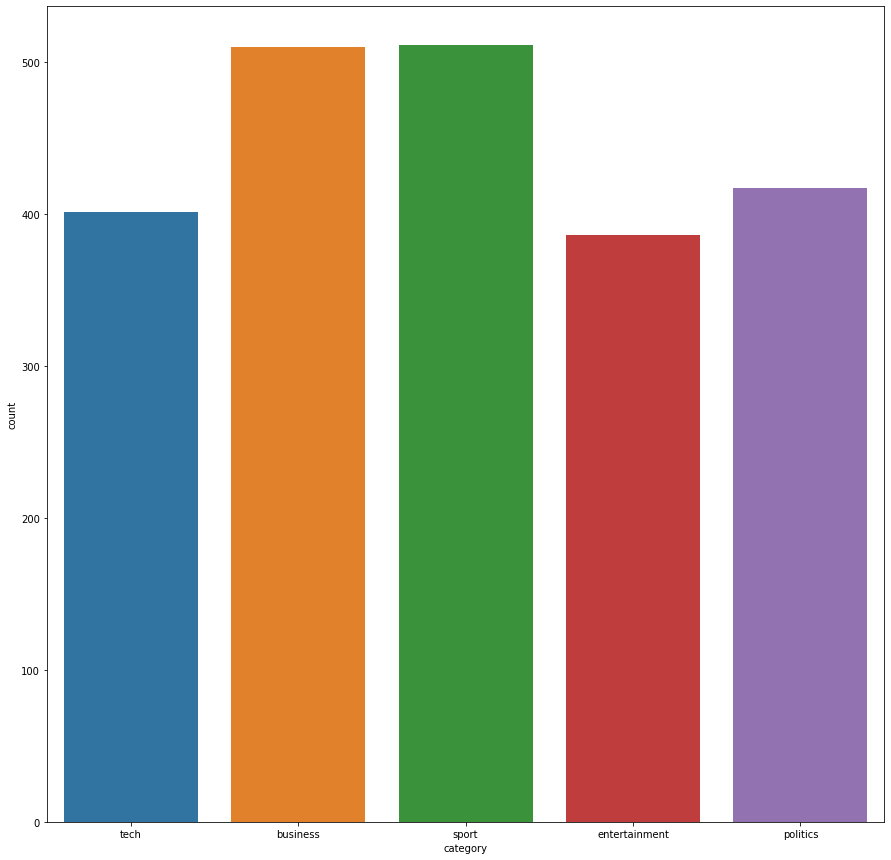

In [3]:
sns.countplot('category', data=bbc)

In [4]:
def func(x):
    return len(x.split(' '))

bbc[bbc['category']=='tech']['text'].apply(func).describe()

count     401.000000
mean      543.466334
std       262.818549
min       170.000000
25%       368.000000
50%       479.000000
75%       682.000000
max      3229.000000
Name: text, dtype: float64

In [5]:
bbc[bbc['category']=='business']['text'].apply(func).describe()

count    510.000000
mean     358.243137
std      149.461482
min      149.000000
25%      253.250000
50%      323.500000
75%      423.250000
max      994.000000
Name: text, dtype: float64

In [6]:
bbc[bbc['category']=='sport']['text'].apply(func).describe()

count     511.000000
mean      363.203523
std       206.238292
min       122.000000
25%       221.000000
50%       314.000000
75%       454.500000
max      1778.000000
Name: text, dtype: float64

In [7]:
bbc[bbc['category']=='entertainment']['text'].apply(func).describe()

count     386.000000
mean      364.357513
std       291.749255
min       155.000000
25%       245.000000
50%       290.500000
75%       403.000000
max      3866.000000
Name: text, dtype: float64

In [8]:
bbc[bbc['category']=='politics']['text'].apply(func).describe()

count     417.000000
mean      496.611511
std       323.724253
min        94.000000
25%       346.000000
50%       486.000000
75%       580.000000
max      4759.000000
Name: text, dtype: float64

In [9]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.text import PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

bbc_stop_words = ['said', 'people', 'new', 'mr', 'quarter', '2004', 'month', 'year', 'ago', 'old', 'don', 'know',
                    'recent', 'months']
custom_stop_words = text.ENGLISH_STOP_WORDS.union(bbc_stop_words)

In [10]:
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(bbc['text'])
features = vectorizer.get_feature_names()

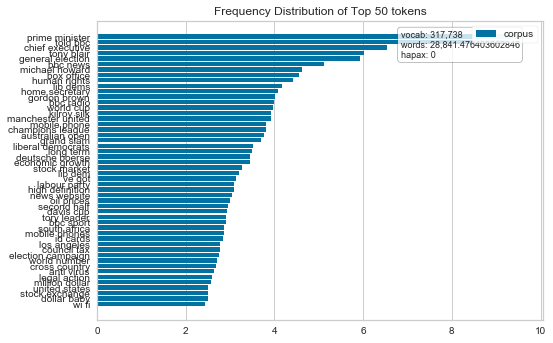

In [11]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [12]:
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['tech'])
features = vectorizer.get_feature_names()

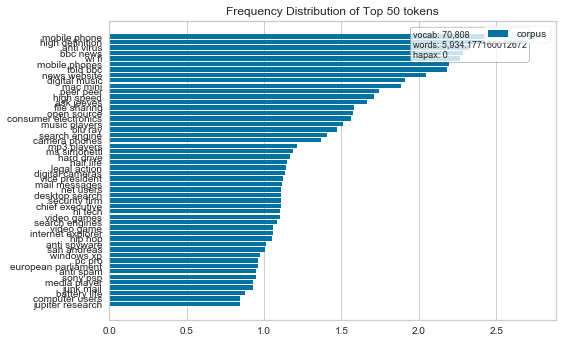

In [13]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

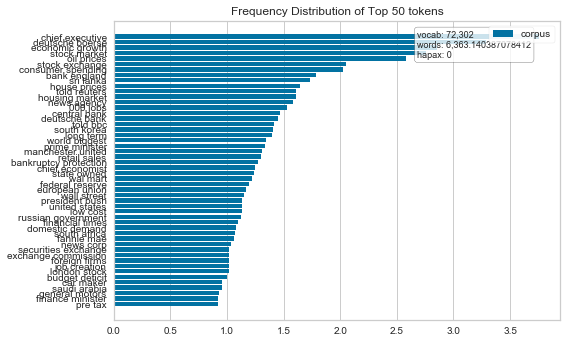

In [14]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['business'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

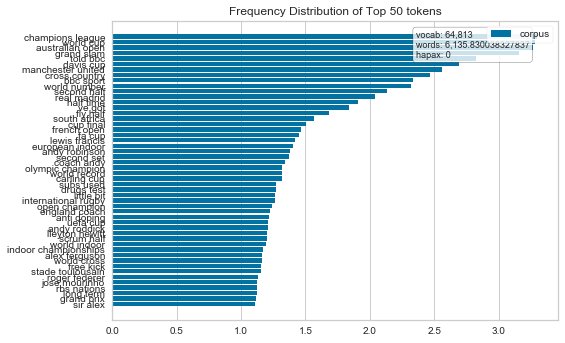

In [15]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['sport'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

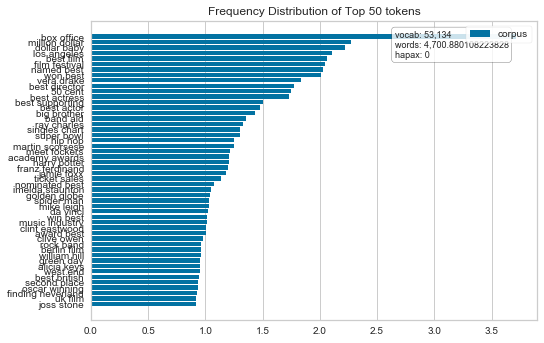

In [16]:
docs = vectorizer.fit_transform(text for text in articles['entertainment'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

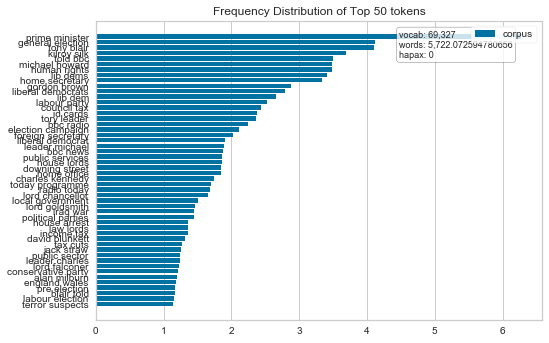

In [17]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
docs = vectorizer.fit_transform(text for text in articles['politics'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

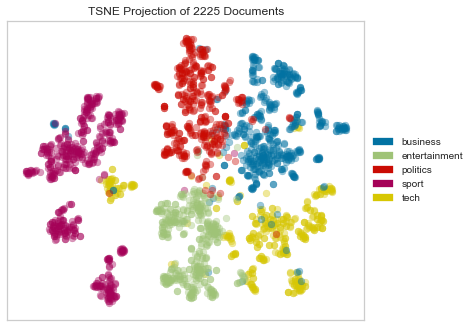

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words)
X = tfidf.fit_transform(bbc['text'])
y = bbc['category']
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

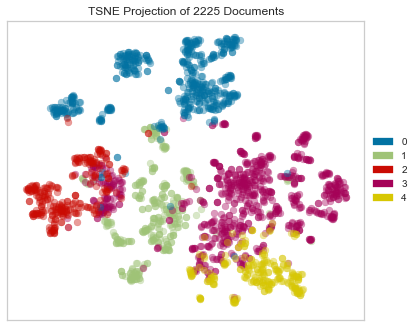

In [19]:
# unsupervised clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y = kmeans.labels_
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(bbc['category'], kmeans.predict(X))

0.0

In [21]:
bbc.iloc[0]

category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               tech
text        tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will b

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit_transform(X)

array([[0.94253887, 0.01440261, 0.01435293, 0.01435264, 0.01435295],
       [0.90816271, 0.02259847, 0.02260126, 0.02403696, 0.0226006 ],
       [0.85404638, 0.07363224, 0.0241072 , 0.02410699, 0.0241072 ],
       ...,
       [0.91138311, 0.02215981, 0.0221525 , 0.02215206, 0.02215252],
       [0.93580426, 0.0160407 , 0.01606452, 0.01604491, 0.01604561],
       [0.90680363, 0.02338078, 0.02327157, 0.02327244, 0.02327158]])

In [23]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])
        print(message)

    
feature_names = tfidf.get_feature_names()

print_top_words(lda, feature_names, 30)

Topic #0: film government world uk labour best time game election music blair years told 000 number just party make market bbc like set brown win games company added won sales play
Topic #1: rugby robinson england ireland wenger referee lions wales arsenal bath hodgson wilkinson ruddock woodward gara driscoll italy wasps ball henson zealand flanker bellamy scrum leicester cole nations newcastle dallaglio penalty
Topic #2: juninho rover seafarers gorges cartridges printer metlife slug yili newry yangtze novo 2d vioxx bach asimo inkjet jaynes hariri solidere schrader sfa aaliyah pbgc lebanon varga hassell saic merck vignal
Topic #3: lse boerse ebbers mci euronext verizon wmc capriati qwest regiments argonaut wolves anil viotti borussia hoddle bdo ambani dortmund tci tgwu mukesh fenice xstrata sayeed ajax umbro curbishley ivanovic 7e7
Topic #4: marsh mirza rochus spitzer adelaide bloglines wipro kronor rossignol feta melzer wpp hardcourt jarvis botin hardie chela ignacio joachim enqvist l

In [24]:
from sklearn.neighbors import KNeighborsClassifier
y_train = pd.read_csv('data/processed/bbc_y_train.csv')
X_train = pd.read_csv('data/processed/bbc_x_train.csv')
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X_train.text.tolist()) 

In [25]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X,y_train)

/Users/jeanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
neigh.predict(X[0])

array([3])

In [27]:
neigh.score(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [2225, 1668]

In [ ]:
from joblib import dump, load
dump(neigh, 'bbc_knn.joblib')

In [ ]:
dump(vectorizer, 'bbc_vec.joblib')

In [ ]:
knn = load('bbc_knn.joblib')

In [ ]:
knn.predict(X[51]) == 1